In [49]:
# Import libries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import lightgbm as lgb
from scipy import stats
from matplotlib.gridspec import GridSpec
from collections import Counter
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, cohen_kappa_score
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier




In [37]:
# ML Model Setup

# Relevant Variables: 

#    1. Volatile acidity
#    2. Chlorides
#    3. Free sulfur dioxide
#    4. Alcohol
#    5. Residaul Sugar

# Models:
# 1. KNN - Nearest Neighbor Algorithms

# Treat Data:
# 1. Split data --> Train vs Test
# 2. Scale data: Standard scaler

# ML Application
# 1. Red/White Predition --> R/W
# 2. Label Prediction
# 3. Label RED Pred
# 4. Label White Pred



In [38]:
# Import dataframes AND Specify a custom delimiter for the CSV input (sep=' ')

# red_df=pd.read_csv(r'C:\Users\jspad\Documents\Code Academy\Data Bases\winequality-red.csv', sep=';')
white_df=pd.read_csv(r'C:\Users\jspad\Documents\Code Academy\Data Bases\winequality-white.csv',sep=';')

In [39]:
#creating new column

red_df['quality_label']= red_df['quality'].apply(lambda value: 'low' 
if value <= 5 else 'medium'
if value <=6 else 'high')

white_df['quality_label']= white_df['quality'].apply(lambda value: 'low' 
if value <= 5 else 'medium'
if value <=6 else 'high')

# transforming these labels into categrical data type

red_df['quality_label'] = pd.Categorical(red_df['quality_label'],
categories=['low', 'medium', 'high'])

white_df['quality_label'] = pd.Categorical(white_df['quality_label'],
categories=['low', 'medium', 'high'])

# Combine the two datasets into wines.

red_df['wine_type'] = 'red'
white_df['wine_type'] = 'white'

wines = pd.concat([red_df, white_df])

# Re-shuffle records just to randomize data points
wines = wines.sample(frac=1, random_state=43).reset_index(drop=True)

wines

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_label,wine_type
0,6.9,0.30,0.36,4.50,0.054,31.0,203.0,0.99513,3.40,0.57,10.4,4,low,white
1,9.0,0.40,0.43,2.40,0.068,29.0,46.0,0.99430,3.20,0.60,12.2,6,medium,red
2,7.6,0.17,0.45,11.20,0.054,56.0,137.0,0.99700,3.15,0.47,10.0,5,low,white
3,6.6,0.29,0.39,6.75,0.031,22.0,98.0,0.99130,3.15,0.80,12.9,7,high,white
4,6.1,0.28,0.22,1.80,0.034,32.0,116.0,0.98980,3.36,0.44,12.6,6,medium,white
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,5.0,0.33,0.18,4.60,0.032,40.0,124.0,0.99114,3.18,0.40,11.0,6,medium,white
6493,6.4,0.24,0.31,2.80,0.038,41.0,114.0,0.99155,3.37,0.66,11.7,7,high,white
6494,5.6,0.25,0.26,3.60,0.037,18.0,115.0,0.99040,3.42,0.50,12.6,6,medium,white
6495,7.4,0.35,0.31,17.95,0.062,42.0,187.0,1.00020,3.27,0.64,9.1,5,low,white


In [42]:
# Model: Random Forest R/W

X = wines.iloc[:, lambda df: [1, 3, 4, 5, 10]]
var_names = X.columns
y = np.array(wines['wine_type'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.09, random_state=42, stratify=wines.wine_type)

stdsc = StandardScaler()
X_train = stdsc.fit_transform(X_train)
X_test = stdsc.transform(X_test)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

pred_wines_rw_forest= clf.predict(X_test)

print(Counter(y_train), Counter(y_test))
print('Features:', list(var_names))

print(pred_wines_rw_forest.shape)
print(y_test.shape)

print(metrics.classification_report(y_test,clf.predict(X_test)))
print(confusion_matrix(y_test,pred_wines_rw_forest))

print("Cohen-Kappa score: ", (cohen_kappa_score(y_test,pred_wines_rw_forest)))
print('Training accuracy: {:.4f}'.format(clf.score(X_train,y_train)))
print('Testing accuracy: {:.4f}'.format(clf.score(X_test,y_test)))




Counter({'white': 4457, 'red': 1455}) Counter({'white': 441, 'red': 144})
Features: ['volatile acidity', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'alcohol']
(585,)
(585,)
              precision    recall  f1-score   support

         red       0.95      0.99      0.97       144
       white       1.00      0.98      0.99       441

    accuracy                           0.98       585
   macro avg       0.97      0.99      0.98       585
weighted avg       0.99      0.98      0.98       585

[[143   1]
 [  8 433]]
Cohen-Kappa score:  0.959213553649864
Training accuracy: 0.9997
Testing accuracy: 0.9846


Counter({'medium': 2411, 'low': 2026, 'high': 1085}) Counter({'medium': 425, 'low': 358, 'high': 192})
Features: ['volatile acidity', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'alcohol']
(975,)
(975,)
              precision    recall  f1-score   support

        high       0.70      0.61      0.65       192
         low       0.75      0.74      0.75       358
      medium       0.68      0.72      0.70       425

    accuracy                           0.71       975
   macro avg       0.71      0.69      0.70       975
weighted avg       0.71      0.71      0.71       975

Testing accuracy: 0.7077
Out-of-bag score estimate: 0.711
Mean accuracy score: 0.708


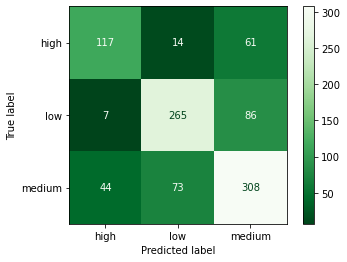

In [54]:
# Model: Random Forest Label

X = wines.iloc[:, lambda df: [1, 3, 4, 5, 10]]
var_names = X.columns
y = np.array(wines['quality_label'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42, stratify=wines.quality_label)

stdsc = StandardScaler()
X_train = stdsc.fit_transform(X_train)
X_test = stdsc.transform(X_test)

clf = RandomForestClassifier(n_estimators=10000, oob_score=True, random_state=123456)
clf.fit(X_train, y_train)

pred_wines_label_forest= clf.predict(X_test)
metrics.plot_confusion_matrix(clf,X_test,y_test,cmap='Greens_r')
accuracy = accuracy_score(y_test, pred_wines_label_forest)

print(Counter(y_train), Counter(y_test))
print('Features:', list(var_names))

print(pred_wines_label_forest.shape)
print(y_test.shape)

print(metrics.classification_report(y_test,clf.predict(X_test)))
#print(confusion_matrix(y_test,pred_wines_label_forest))
#print("Cohen-Kappa score: ", (cohen_kappa_score(y_test,pred_wines_label_forest)))
#print('Training accuracy: {:.4f}'.format(clf.score(X_train,y_train)))
print('Testing accuracy: {:.4f}'.format(clf.score(X_test,y_test)))
print(f'Out-of-bag score estimate: {clf.oob_score_:.3}')
print(f'Mean accuracy score: {accuracy:.3}')




In [ ]:
# Model: Random Forest Label RED

X = red_df.iloc[:, lambda df: [1, 3, 4, 5, 10]]
var_names = X.columns
y = np.array(red_df['quality_label'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=red_df.quality_label)

stdsc = StandardScaler()
X_train = stdsc.fit_transform(X_train)
X_test = stdsc.transform(X_test)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

pred_red_forest= clf.predict(X_test)

print(Counter(y_train), Counter(y_test))
print('Features:', list(var_names))

print(pred_red_forest.shape)
print(y_test.shape)

print(metrics.classification_report(y_test,clf.predict(X_test)))
print(confusion_matrix(y_test,pred_red_forest))

print("Cohen-Kappa score: ", (cohen_kappa_score(y_test,pred_red_forest)))
print('Training accuracy: {:.4f}'.format(clf.score(X_train,y_train)))
print('Testing accuracy: {:.4f}'.format(clf.score(X_test,y_test)))


Counter({'low': 670, 'medium': 574, 'high': 195}) Counter({'low': 74, 'medium': 64, 'high': 22})
Features: ['volatile acidity', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'alcohol']
(160,)
(160,)
              precision    recall  f1-score   support

        high       0.58      0.50      0.54        22
         low       0.78      0.84      0.81        74
      medium       0.68      0.66      0.67        64

    accuracy                           0.72       160
   macro avg       0.68      0.66      0.67       160
weighted avg       0.71      0.72      0.72       160

[[11  2  9]
 [ 1 62 11]
 [ 7 15 42]]
Cohen-Kappa score:  0.5314940135346174
Training accuracy: 1.0000
Testing accuracy: 0.7188


In [ ]:
# Model: Random Forest Label white

X = white_df.iloc[:, lambda df: [1, 3, 4, 5, 10]]
var_names = X.columns
y = np.array(white_df['quality_label'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42, stratify=white_df.quality_label)

stdsc = StandardScaler()
X_train = stdsc.fit_transform(X_train)
X_test = stdsc.transform(X_test)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

pred_white_forest= clf.predict(X_test)

print(Counter(y_train), Counter(y_test))
print('Features:', list(var_names))

print(pred_white_forest.shape)
print(y_test.shape)

print(metrics.classification_report(y_test,clf.predict(X_test)))
print(confusion_matrix(y_test,pred_white_forest))

print("Cohen-Kappa score: ", (cohen_kappa_score(y_test,pred_white_forest)))
print('Training accuracy: {:.4f}'.format(clf.score(X_train,y_train)))
print('Testing accuracy: {:.4f}'.format(clf.score(X_test,y_test)))


Counter({'medium': 1868, 'low': 1394, 'high': 901}) Counter({'medium': 330, 'low': 246, 'high': 159})
Features: ['volatile acidity', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'alcohol']
(735,)
(735,)
              precision    recall  f1-score   support

        high       0.73      0.58      0.65       159
         low       0.76      0.73      0.74       246
      medium       0.67      0.75      0.70       330

    accuracy                           0.71       735
   macro avg       0.72      0.69      0.70       735
weighted avg       0.71      0.71      0.71       735

[[ 93   7  59]
 [  2 179  65]
 [ 32  51 247]]
Cohen-Kappa score:  0.5320954907161803
Training accuracy: 0.9998
Testing accuracy: 0.7061


In [ ]:
#%reset